In [1]:
%matplotlib inline

In [2]:
# Imports

# pandas
import pandas as pd
from pandas import Series,DataFrame
import csv
# numpy, matplotlib, seaborn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

# machine learning
import xgboost as xgb

In [3]:
#print(open('../../../../../../root/all.csv').read())
CD_df  = pd.read_csv("../../../../../home/jpati/all.csv", dtype={'AUTHORIZED_CAPITAL': str,'PAIDUP_CAPITAL': str})
#CD_df.replace(['NA'], [0])
CD_df.loc[CD_df['COMPANY_CLASS'] == 'OPC', 'COMPANY_CLASS'] = 'One Person Company'
CD_df.loc[CD_df['COMPANY_CLASS'] == 'PRIV', 'COMPANY_CLASS'] = 'Private'
CD_df.loc[CD_df['COMPANY_CLASS'] == 'PUBC', 'COMPANY_CLASS'] = 'Public'
CD_df.AUTHORIZED_CAPITAL = CD_df.AUTHORIZED_CAPITAL.str.replace(',', '').astype(float)
CD_df.PAIDUP_CAPITAL = CD_df.PAIDUP_CAPITAL.str.replace(',', '').astype(float)
CD_df = CD_df[CD_df.columns[0:13]]
CD_df.tail()

/opt/rh/python27/root/usr/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2902: DtypeWarning: Columns (13,14,15,16,17,18,19,20) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,CORPORATE_IDENTIFICATION_NUMBER,COMPANY_NAME,COMPANY_STATUS,COMPANY_CLASS,COMPANY_CATEGORY,AUTHORIZED_CAPITAL,PAIDUP_CAPITAL,DATE_OF_REGISTRATION,REGISTERED_STATE,REGISTRAR_OF_COMPANIES,PRINCIPAL_BUSINESS_ACTIVITY,REGISTERED_OFFICE_ADDRESS,SUB_CATEGORY
1018789,U01132WB1984PTC151081,THRIBHUVAN ASSOCIATES PVT LTD,AMALGAMATED,Private,Company Limited by Shares,1500000,1100000,24-09-1984,West Bengal,RoC-Kolkata,Agriculture and Allied Activities,"23/24, RADHA BAZAR STREET SETHIA HOUSE, 4TH FL...",Indian Non-Government Company
1018790,U15419WB1995PTC067588,MITTAL AGRO FOOD PVT. LTD.,ACTIVE IN PROGRESS,Private,Company Limited by Shares,2500000,2500000,19-01-1995,West Bengal,RoC-Kolkata,Manufacturing (Food stuffs),4 COMMERCIAL BUILDING 23N S RD KOLKATA West Be...,Indian Non-Government Company
1018791,U51219WB1993PTC058966,KUNDU AGRO CHEM PVT LTD,ACTIVE IN PROGRESS,Private,Company Limited by Shares,2500000,1211000,26-05-1993,West Bengal,RoC-Kolkata,Trading,BODAI INDUSTRIAL ESTATE P O JUGBERIA West Beng...,Indian Non-Government Company
1018792,U51109WB1955PTC022263,MAHESHWARY IMPORT & EXPORT PVT LTD,ACTIVE IN PROGRESS,Private,Company Limited by Shares,4500000,4400000,01-04-1955,West Bengal,RoC-Kolkata,Trading,1 OLD COURT HOUSE STTOBACCO HOUSE ROOM NO 503 ...,Indian Non-Government Company
1018793,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
CD1 = CD_df.groupby( [ "REGISTERED_STATE" ])
PC = CD1[["PAIDUP_CAPITAL"]].sum()
AC = CD1[["AUTHORIZED_CAPITAL"]].sum()

In [5]:
PC_df = DataFrame({'REGISTERED_STATE':PC.index,
                      'PAIDUP_CAPITAL':PC.PAIDUP_CAPITAL,
                          'AUTHORIZED_CAPITAL':AC.AUTHORIZED_CAPITAL}, 
                      columns=['REGISTERED_STATE', 'PAIDUP_CAPITAL', 'AUTHORIZED_CAPITAL'])
PC_df.head()

,REGISTERED_STATE,PAIDUP_CAPITAL,AUTHORIZED_CAPITAL
REGISTERED_STATE,,,
Andaman and Nicobar Islands,Andaman and Nicobar Islands,7.727436e+08,1.207650e+09
Andhra Pradesh,Andhra Pradesh,4.688293e+11,9.399157e+11
Arunachal Pradesh,Arunachal Pradesh,2.445016e+09,1.233630e+10
Assam,Assam,9.682426e+10,2.341765e+11
Bihar,Bihar,4.280561e+10,1.403255e+11


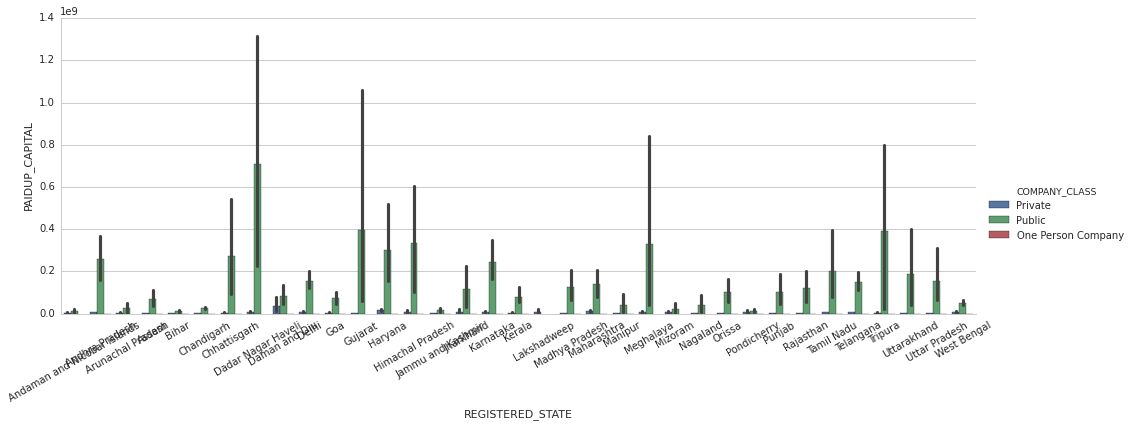

In [7]:
#fig, (axis1) = plt.subplots(1,figsize=(15,4))
#axis1.set_title('State-wise Paid Up Capital for each Company Class')
#axis1.set_ylabel("PAIDUP_CAPITAL")
#sns.barplot(x='REGISTERED_STATE', y='PAIDUP_CAPITAL', hue='COMPANY_CLASS', data=CD_df)
g = sns.factorplot(x='REGISTERED_STATE', y='PAIDUP_CAPITAL', hue='COMPANY_CLASS', data=CD_df,kind='bar',size=5, aspect=2.8)
g.set_xticklabels(rotation=30)

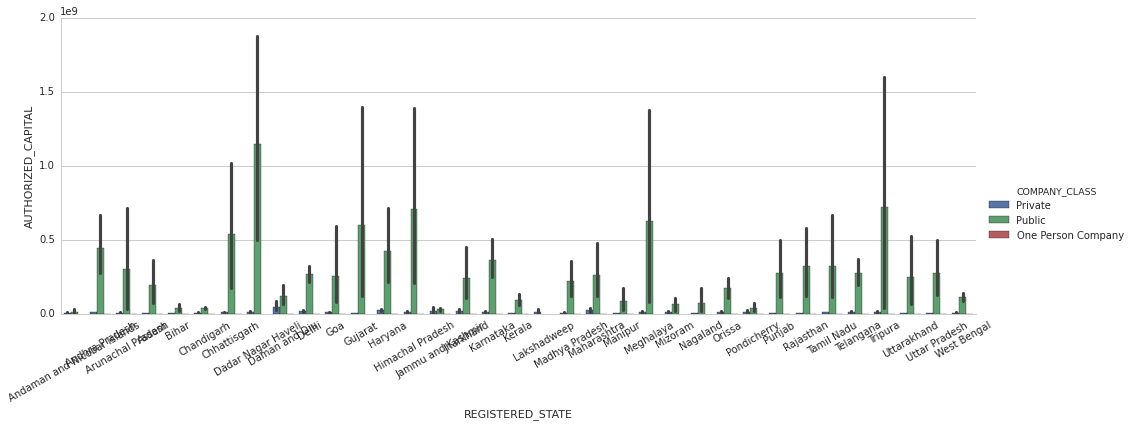

In [8]:
#fig, (axis1) = plt.subplots(1,figsize=(15,4))
#sns.barplot(x='REGISTERED_STATE', y='AUTHORIZED_CAPITAL', hue='COMPANY_CLASS', data=CD_df)
ga = sns.factorplot(x='REGISTERED_STATE', y='AUTHORIZED_CAPITAL', hue='COMPANY_CLASS', data=CD_df,kind='bar',size=5, aspect=2.8)
ga.set_xticklabels(rotation=30)

In [55]:
state = raw_input('Enter a state:')
x = CD1.get_group(state)
y = x.groupby(["PRINCIPAL_BUSINESS_ACTIVITY"])
Ind = x.groupby(["PRINCIPAL_BUSINESS_ACTIVITY"])['COMPANY_NAME'].agg(['count'])

Ind_df = DataFrame({'PRINCIPAL_BUSINESS_ACTIVITY':Ind.index,
                      'Count1':Ind['count']}, 
                      columns=['PRINCIPAL_BUSINESS_ACTIVITY', 'Count1'])

Ind_df.sort('Count1', ascending=False).head(8)[['Count1']]

Enter a state:Assam


/opt/rh/python27/root/usr/lib/python2.7/site-packages/ipykernel/__main__.py:12: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Count1
PRINCIPAL_BUSINESS_ACTIVITY,
Trading,2093
Business Services,1083
"Manufacturing (Metals & Chemicals, and products thereof)",866
Construction,812
Real Estate and Renting,795
Agriculture and Allied Activities,712
"Community, personal & Social Services",545
Finance,511


For Assam State-wise Paid Up Capital for each Industry


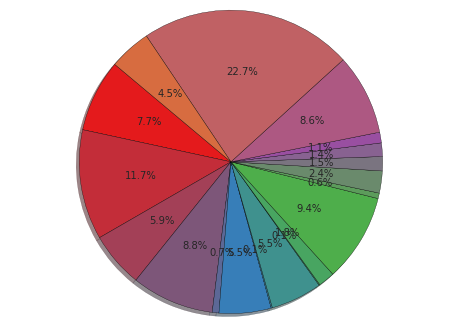

In [37]:
from matplotlib import cm

#Make Pie Chart
print('For ' + state + ' State-wise Paid Up Capital for each Industry')

# Data to plot
sizes = y[["COMPANY_NAME"]].count()
cs=cm.Set1(np.arange(40)/40.)
# Plot
plt.pie(sizes, autopct='%1.1f%%', colors=cs, shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [59]:
CD2 = CD_df.groupby( [ "SUB_CATEGORY" ])
Ind2 = x.groupby(["SUB_CATEGORY"])['COMPANY_NAME'].agg(['count'])
z = x.groupby(["SUB_CATEGORY"])
Ind2_df = DataFrame({'SUB_CATEGORY':Ind2.index,
                      'Count2':Ind2['count']}, 
                      columns=['SUB_CATEGORY', 'Count2'])

Ind2_df.sort('Count2', ascending=False).head(8)[['Count2']]

/opt/rh/python27/root/usr/lib/python2.7/site-packages/ipykernel/__main__.py:8: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,Count2
SUB_CATEGORY,
Indian Non-Government Company,9162
State Government Company,50
Others,31
Company licensed under Section25,8
Union Government Company,8
Guarantee and association Company,4


For Assam State-wise distribution of Sub Category of Companies 


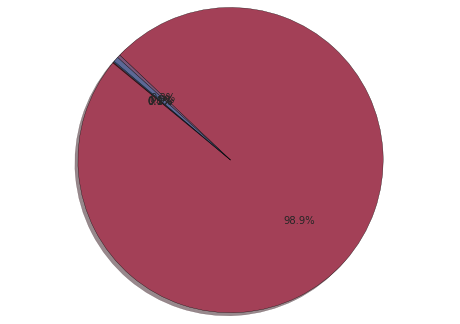

In [62]:
from matplotlib import cm

#Make Pie Chart
print('For ' + state + ' State-wise distribution of Sub Category of Companies ')

# Data to plot
sizes = z[["COMPANY_NAME"]].count()
cs=cm.Set1(np.arange(40)/40.)
# Plot
plt.pie(sizes, autopct='%1.1f%%', colors=cs, shadow=True, startangle=140)
 
plt.axis('equal')
plt.show()

In [61]:
#highest paid up capital and authorised capital per state - simple barplot

MPC = CD1[["PAIDUP_CAPITAL"]].max()
MPC_df = DataFrame({'REGISTERED_STATE':MPC.index,
                      'MAX_Value':MPC.PAIDUP_CAPITAL, 'Category':'PAIDUP CAPITAL'}, 
                      columns=['REGISTERED_STATE', 'MAX_Value', 'Category'])

MAC = CD1[["AUTHORIZED_CAPITAL"]].max()
MAC_df = DataFrame({'REGISTERED_STATE':MAC.index,
                      'MAX_Value':MAC.AUTHORIZED_CAPITAL, 'Category':'AUTHORIZED CAPITAL'}, 
                      columns=['REGISTERED_STATE', 'MAX_Value', 'Category'])
#.astype(str)
frames = [MPC_df, MAC_df]
result = pd.concat(frames)
result_df = DataFrame({'REGISTERED_STATE':result.index,
                      'MAX Value':result.MAX_Value, 'Category':result.Category}, 
                      columns=['REGISTERED_STATE', 'MAX Value', 'Category'])
result_df.sort('MAX Value', ascending=False).head(8)[['MAX Value', 'Category']]

/opt/rh/python27/root/usr/lib/python2.7/site-packages/ipykernel/__main__.py:18: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,MAX Value,Category
REGISTERED_STATE,,
Uttar Pradesh,6.000000e+11,AUTHORIZED CAPITAL
Gujarat,5.000000e+11,AUTHORIZED CAPITAL
Delhi,5.000000e+11,AUTHORIZED CAPITAL
Gujarat,4.226346e+11,PAIDUP CAPITAL
Uttar Pradesh,3.975082e+11,PAIDUP CAPITAL
West Bengal,3.009200e+11,PAIDUP CAPITAL
Rajasthan,2.500000e+11,AUTHORIZED CAPITAL
Karnataka,2.000000e+11,AUTHORIZED CAPITAL


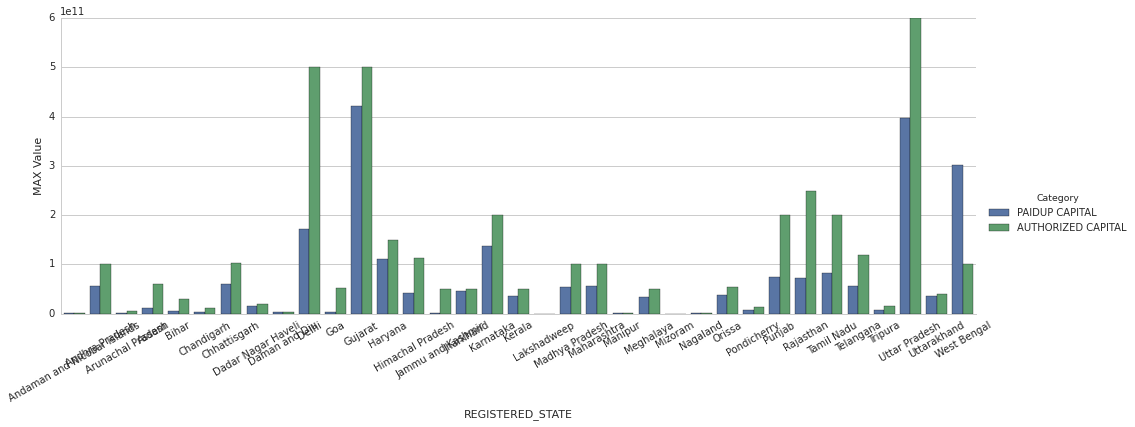

In [13]:
#fig, (axis1) = plt.subplots(1,figsize=(15,4))
#axis1.set_title('State-wise Paid Up Capital for each Company Class')
#axis1.set_ylabel("PAIDUP_CAPITAL")
gai = sns.factorplot(x='REGISTERED_STATE', y='MAX Value', hue='Category', data=result_df,kind='bar',size=5, aspect=2.8)
gai.set_xticklabels(rotation=30)
#sns.barplot(x='REGISTERED_STATE', y='MAX Value', hue='Category', data=result_df)

In [28]:
#highest paid up capital and authorised capital per industry - simple barplot
Raw_ByCategory_DF = CD_df.groupby( [ "PRINCIPAL_BUSINESS_ACTIVITY" ])
#CD_df.groupby('PRINCIPAL_BUSINESS_ACTIVITY')['PAIDUP_CAPITAL'].agg(np.max)
MPC = Raw_ByCategory_DF[["PAIDUP_CAPITAL"]].max()
MPC_df = DataFrame({'PRINCIPAL_BUSINESS_ACTIVITY':MPC.index,
                      'MAX_Value':MPC.PAIDUP_CAPITAL, 'Category':'PAIDUP CAPITAL'}, 
                      columns=['PRINCIPAL_BUSINESS_ACTIVITY', 'MAX_Value', 'Category'])

MAC = Raw_ByCategory_DF[["AUTHORIZED_CAPITAL"]].max()
MAC_df = DataFrame({'PRINCIPAL_BUSINESS_ACTIVITY':MAC.index,
                      'MAX_Value':MAC.AUTHORIZED_CAPITAL, 'Category':'AUTHORIZED CAPITAL'}, 
                      columns=['PRINCIPAL_BUSINESS_ACTIVITY', 'MAX_Value', 'Category'])

frames = [MPC_df, MAC_df]
result = pd.concat(frames)
result_df = DataFrame({'PRINCIPAL_BUSINESS_ACTIVITY':result.index,
                      'MAX Value':result.MAX_Value, 'Category':result.Category}, 
                      columns=['PRINCIPAL_BUSINESS_ACTIVITY', 'MAX Value', 'Category'])
result_df.sort('MAX Value', ascending=False).head(8)[['MAX Value', 'Category']]
#fig, (axis1) = plt.subplots(1,figsize=(15,4))

/opt/rh/python27/root/usr/lib/python2.7/site-packages/ipykernel/__main__.py:19: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


,MAX Value,Category
PRINCIPAL_BUSINESS_ACTIVITY,,
Manufacturing (Machinery & Equipments),6.000000e+11,AUTHORIZED CAPITAL
Construction,5.000000e+11,AUTHORIZED CAPITAL
Construction,4.226346e+11,PAIDUP CAPITAL
Manufacturing (Machinery & Equipments),3.975082e+11,PAIDUP CAPITAL
Trading,3.009200e+11,PAIDUP CAPITAL
"Transport, storage and Communications",2.500000e+11,AUTHORIZED CAPITAL
Business Services,2.500000e+11,AUTHORIZED CAPITAL
"Electricity, Gas & Water companies",2.000000e+11,AUTHORIZED CAPITAL


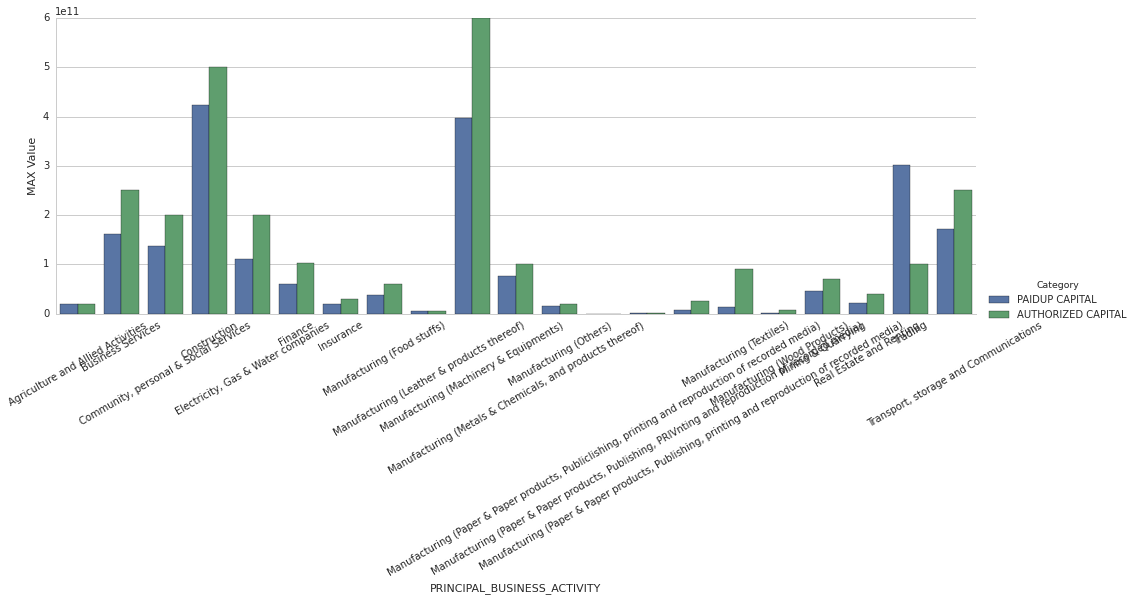

In [11]:
gain= sns.factorplot(x='PRINCIPAL_BUSINESS_ACTIVITY', y='MAX Value', hue='Category', data=result_df,kind='bar',size=5, aspect=2.8)
gain.set_xticklabels(rotation=30)

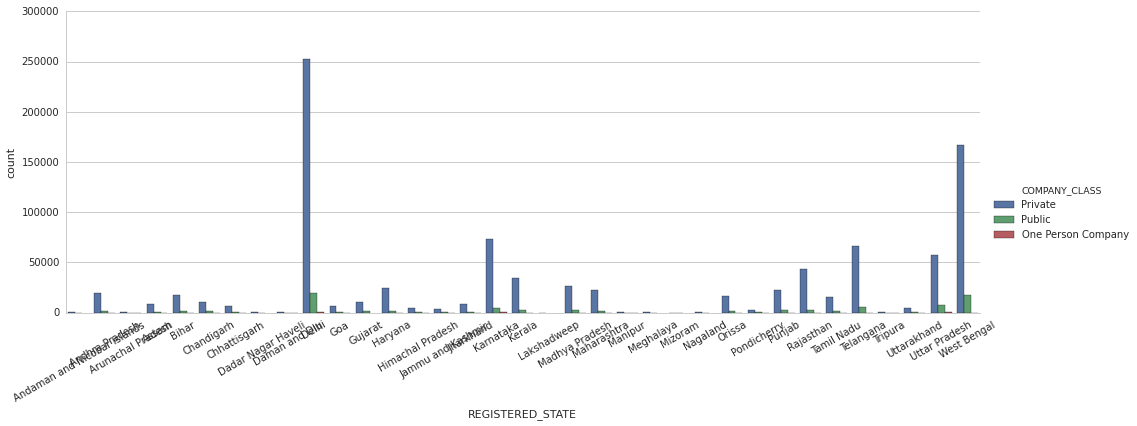

In [15]:
#Count of private and public companies for each state - simple barplot
gains = sns.factorplot(x='REGISTERED_STATE', hue='COMPANY_CLASS', data=CD_df,kind='count',size=5, aspect=2.8)
gains.set_xticklabels(rotation=30)

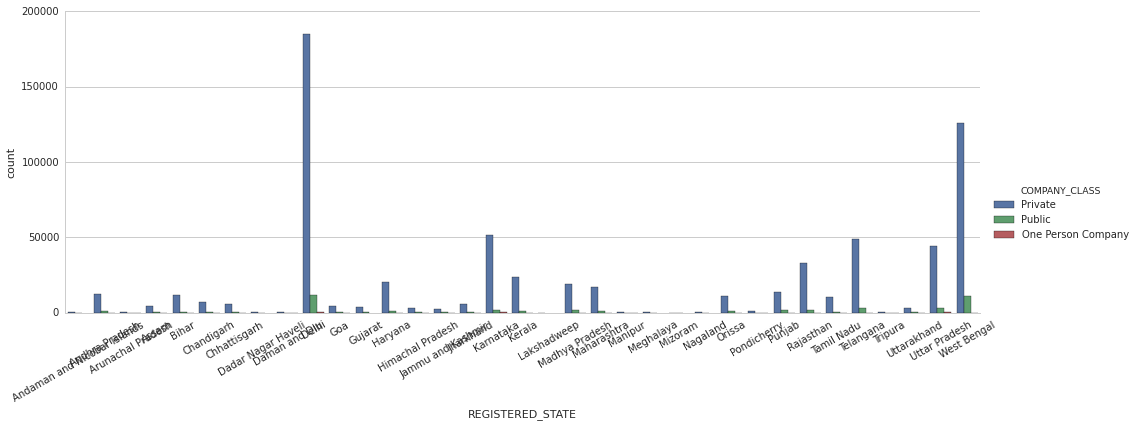

In [16]:
#Count of private and public ACTIVE companies for each state - simple barplot
activeOnly = CD_df[CD_df.COMPANY_STATUS == 'ACTIVE']
gainsa = sns.factorplot(x='REGISTERED_STATE', hue='COMPANY_CLASS', data=activeOnly,kind='count',size=5, aspect=2.8)
gainsa.set_xticklabels(rotation=30)

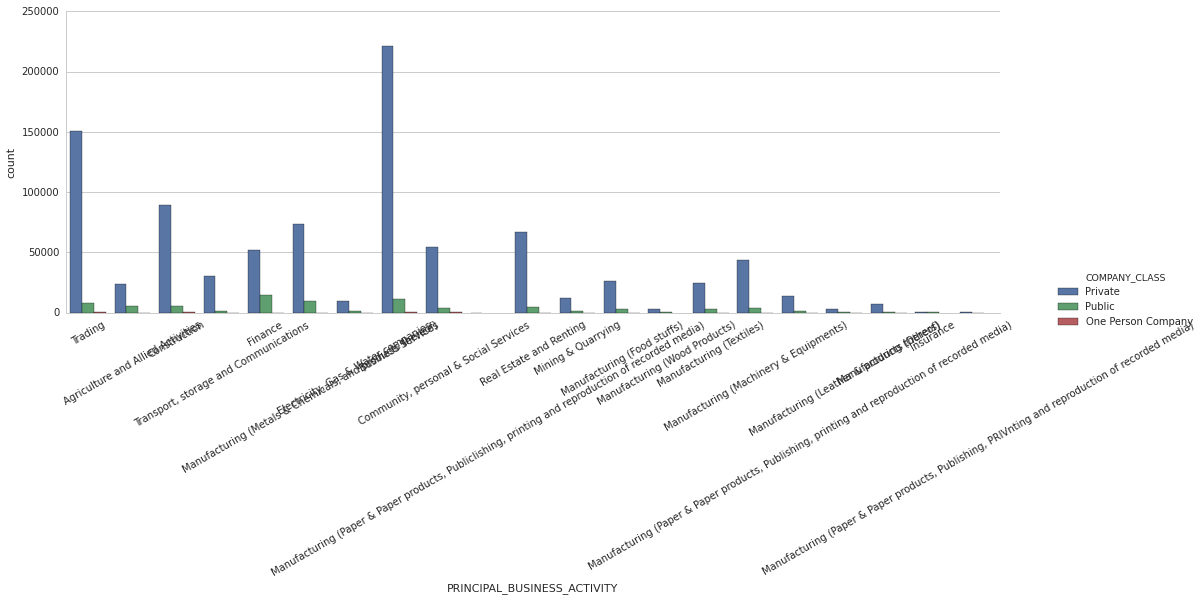

In [17]:
#Count of private and public companies for each industry - simple barplot
go = sns.factorplot(x='PRINCIPAL_BUSINESS_ACTIVITY', hue='COMPANY_CLASS', data=CD_df,kind='count',size=5, aspect=2.8)
go.set_xticklabels(rotation=30)

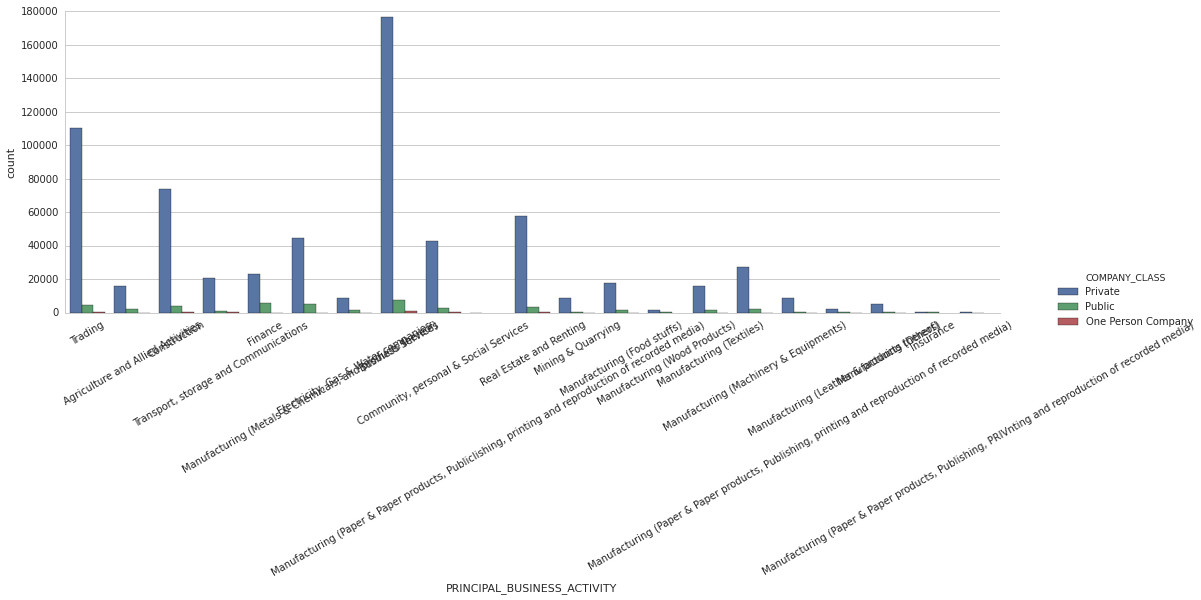

In [22]:
#Count of private and public ACTIVE companies for each industry - simple barplot
ge = sns.factorplot(x='PRINCIPAL_BUSINESS_ACTIVITY', hue='COMPANY_CLASS', data=activeOnly,kind='count',size=5, aspect=2.8)
ge.set_xticklabels(rotation=30)